In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import random
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from datetime import timedelta
import seaborn as sns
from EMS_EDA_Func_Cleaned import *

In [2]:
from scipy import stats

In [4]:
df = pd.read_csv('Time_Delta_Data_Fin',index_col=0, parse_dates=['Call Date', 'Received DtTm',
       'Dispatch DtTm', 'Response DtTm', 'On Scene DtTm', 'Transport DtTm',
       'Hospital DtTm'])

/home/christopher/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/christopher/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [5]:
df.head()

,Call Number,Unit ID,Call Type,Call Date,Received DtTm,Dispatch DtTm,Response DtTm,On Scene DtTm,Transport DtTm,Hospital DtTm,...,Final Priority,ALS Unit,Call Type Group,Unit Type,Neighborhooods - Analysis Boundaries,call_to_disp,disp_to_resp,resp_to_scene,time_to_hosp,call_to_scene
0,201100018,67,Medical Incident,2020-04-19,2020-04-19 00:10:45,2020-04-19 00:11:17,2020-04-19 00:11:20,2020-04-19 00:27:37,2020-04-19 00:40:09,2020-04-19 00:45:11,...,2,True,Non Life-threatening,MEDIC,Tenderloin,32.0,3.0,977.0,302.0,1012.0
1,201100034,86,Medical Incident,2020-04-19,2020-04-19 00:18:37,2020-04-19 00:20:31,2020-04-19 00:20:45,2020-04-19 00:24:27,2020-04-19 01:20:28,2020-04-19 01:32:50,...,3,True,Non Life-threatening,MEDIC,Tenderloin,114.0,14.0,222.0,742.0,350.0
2,201100034,QRV1,Medical Incident,2020-04-19,2020-04-19 00:18:37,2020-04-19 00:20:31,2020-04-19 00:20:36,2020-04-19 00:24:51,NaT,NaT,...,3,True,Non Life-threatening,SUPPORT,Tenderloin,114.0,5.0,255.0,NaN,374.0
3,201100053,E19,Traffic Collision,2020-04-19,2020-04-19 00:24:45,2020-04-19 00:29:54,2020-04-19 00:31:50,2020-04-19 00:35:37,NaT,NaT,...,3,True,Non Life-threatening,ENGINE,West of Twin Peaks,309.0,116.0,227.0,NaN,652.0
4,201100053,KM07,Traffic Collision,2020-04-19,2020-04-19 00:24:45,2020-04-19 00:29:54,2020-04-19 00:30:27,2020-04-19 00:36:47,2020-04-19 00:58:25,2020-04-19 01:22:09,...,3,False,Non Life-threatening,PRIVATE,West of Twin Peaks,309.0,33.0,380.0,1424.0,722.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3926607 entries, 0 to 5324765
Data columns (total 23 columns):
Call Number                             int64
Unit ID                                 object
Call Type                               object
Call Date                               datetime64[ns]
Received DtTm                           datetime64[ns]
Dispatch DtTm                           datetime64[ns]
Response DtTm                           datetime64[ns]
On Scene DtTm                           datetime64[ns]
Transport DtTm                          datetime64[ns]
Hospital DtTm                           datetime64[ns]
Call Final Disposition                  object
Available DtTm                          object
Battalion                               object
Final Priority                          int64
ALS Unit                                bool
Call Type Group                         object
Unit Type                               object
Neighborhooods - Analysis Boundaries

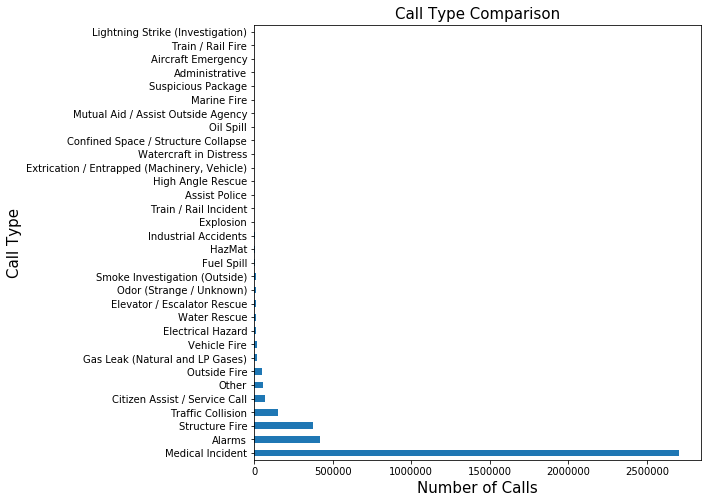

In [11]:
df['Call Type'].value_counts().plot.barh(figsize = (8,8))
plt.title('Call Type Comparison', fontsize = 15)
plt.ylabel('Call Type', fontsize = 15)
plt.xlabel('Number of Calls', fontsize = 15)
plt.savefig('Call_Type_Comparison.png',bbox_inches="tight")

In [14]:
#can see medical incidents and alarms make up most of calls, and they would be most relevant to homeless population
df = df[df['Call Type'].isin(['Medical Incident','Alarms'])]
print(f'Final Number of Events: {len(df)}')

Final Number of Events: 3125220


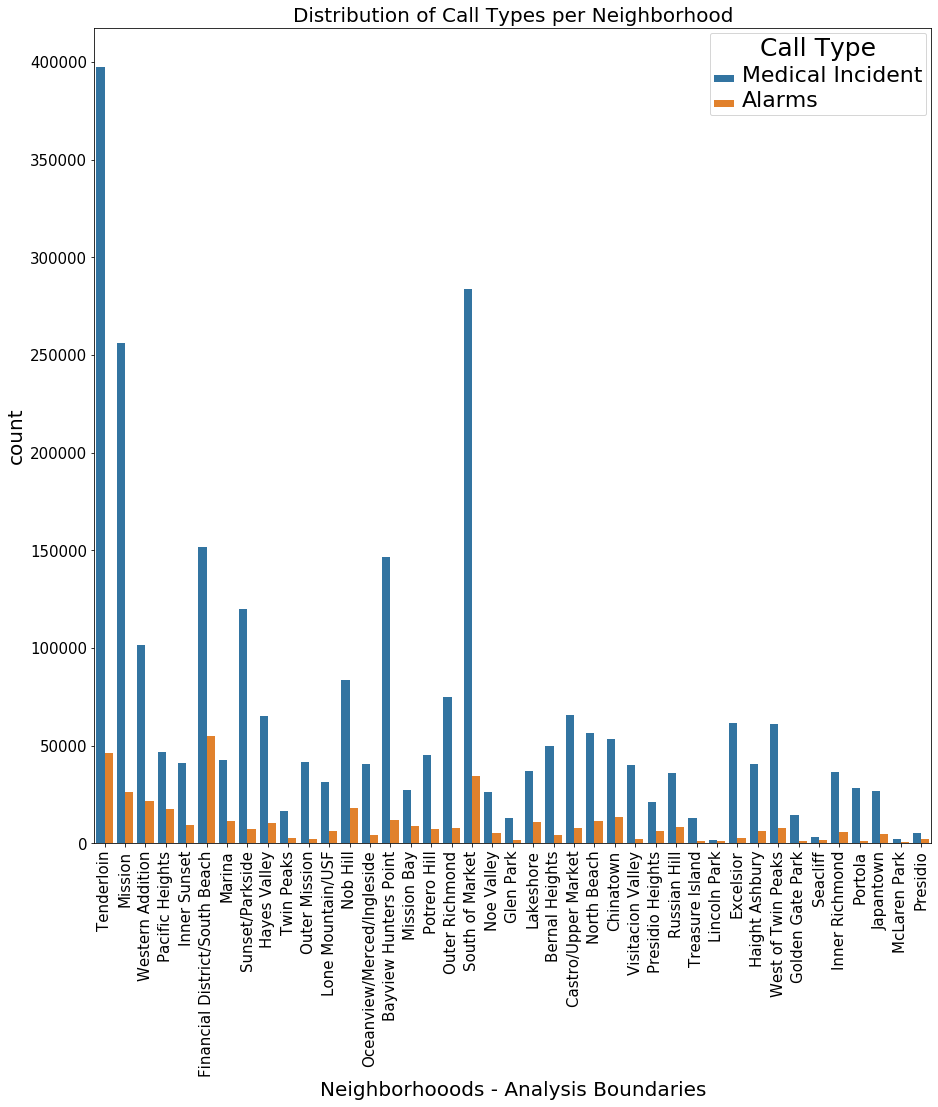

In [25]:
sub_occ_bar_graph(df, 'Neighborhooods - Analysis Boundaries', 'Call Type', 'Distribution of Call Types per Neighborhood')
plt.savefig('Dist_of_Calls_by_Neighborhood.png',bbox_inches="tight")

## Interested in comparing neighborhoods with high homeless populations

In [26]:
high_homeless = ['Financial District/South Beach','Tenderloin','South of Market',
                 'Potrero Hill','Mission Bay','Bayview Hunters Point','Excelsior',
                 'Hayes Valley', 'Visitacion Valley','Portola','McLaren Park']

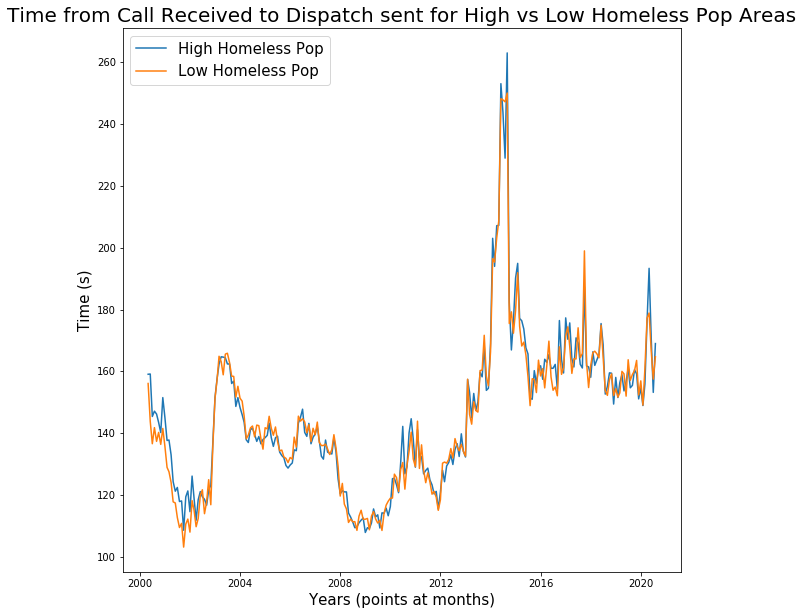

In [27]:
fig, ax = plt.subplots(figsize = (10,10))

plt.plot(df[df['Neighborhooods - Analysis Boundaries'].isin(high_homeless)].resample('M', on='Call Date').mean()['call_to_disp'])
plt.plot(df[~df['Neighborhooods - Analysis Boundaries'].isin(high_homeless)].resample('M', on='Call Date').mean()['call_to_disp'])
plt.xlabel('Years (points at months)', fontsize = 15)
plt.ylabel('Time (s)', fontsize = 15)
plt.title('Time from Call Received to Dispatch sent for High vs Low Homeless Pop Areas', fontsize = 20)
plt.legend(('High Homeless Pop','Low Homeless Pop'), fontsize = 15)
plt.savefig('Call_to_Disp.png',bbox_inches="tight")
    

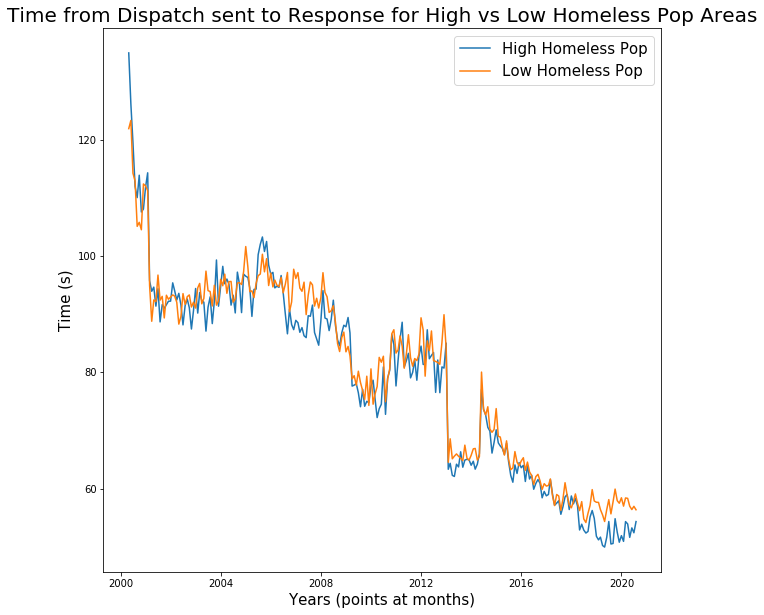

In [28]:
fig, ax = plt.subplots(figsize = (10,10))

plt.plot(df[df['Neighborhooods - Analysis Boundaries'].isin(high_homeless)].resample('M', on='Call Date').mean()['disp_to_resp'])
plt.plot(df[~df['Neighborhooods - Analysis Boundaries'].isin(high_homeless)].resample('M', on='Call Date').mean()['disp_to_resp'])
plt.xlabel('Years (points at months)', fontsize = 15)
plt.ylabel('Time (s)', fontsize = 15)
plt.title('Time from Dispatch sent to Response for High vs Low Homeless Pop Areas', fontsize = 20)
plt.legend(('High Homeless Pop','Low Homeless Pop'), fontsize = 15)
plt.savefig('Disp_to_Resp.png',bbox_inches="tight")

## Consistent decrease in both areas ^




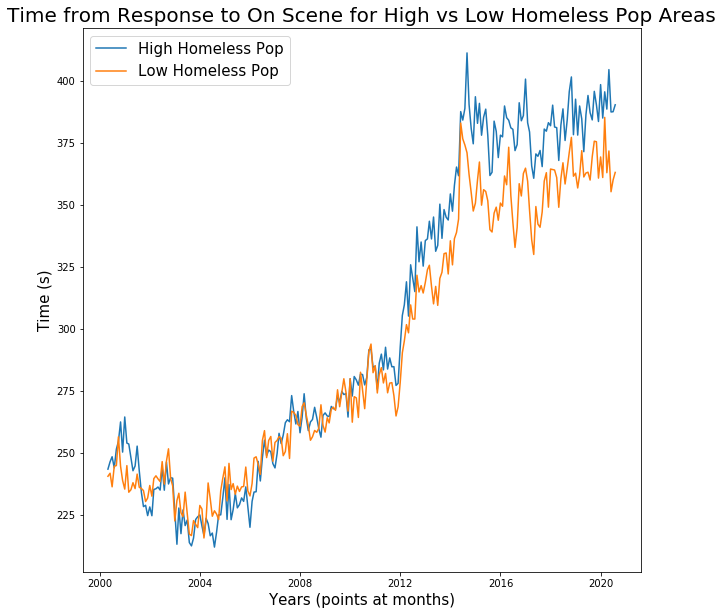

In [29]:
fig, ax = plt.subplots(figsize = (10,10))

plt.plot(df[df['Neighborhooods - Analysis Boundaries'].isin(high_homeless)].resample('M', on='Call Date').mean()['resp_to_scene'])
plt.plot(df[~df['Neighborhooods - Analysis Boundaries'].isin(high_homeless)].resample('M', on='Call Date').mean()['resp_to_scene'])
plt.xlabel('Years (points at months)', fontsize = 15)
plt.ylabel('Time (s)', fontsize = 15)
plt.title('Time from Response to On Scene for High vs Low Homeless Pop Areas', fontsize = 20)
plt.legend(('High Homeless Pop','Low Homeless Pop'), fontsize = 15)
plt.savefig('Resp_to_Scene.png',bbox_inches="tight")

## Steady increase in time ^ 

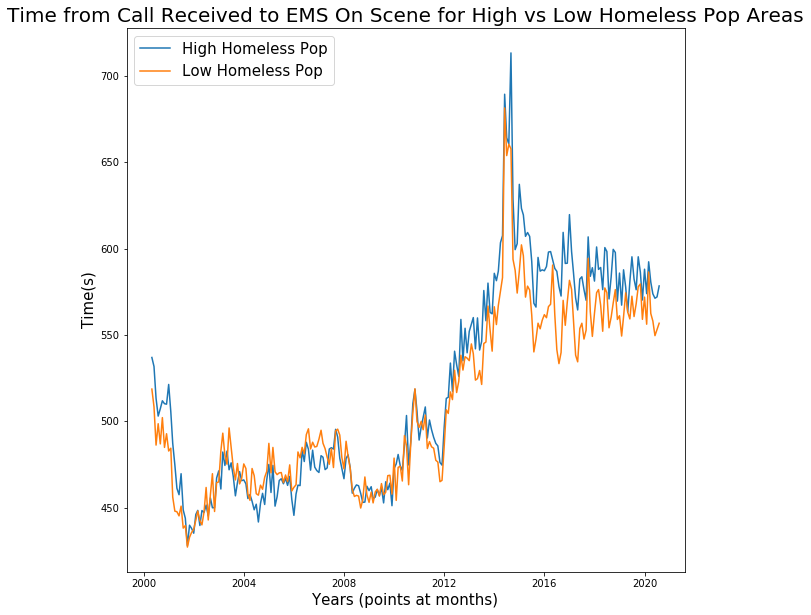

In [31]:
fig, ax = plt.subplots(figsize = (10,10))

plt.plot(df[df['Neighborhooods - Analysis Boundaries'].isin(high_homeless)].resample('M', on='Call Date').mean()['call_to_scene'])
plt.plot(df[~df['Neighborhooods - Analysis Boundaries'].isin(high_homeless)].resample('M', on='Call Date').mean()['call_to_scene'])
plt.xlabel('Years (points at months)', fontsize = 15)
plt.ylabel('Time(s)', fontsize = 15)
plt.title('Time from Call Received to EMS On Scene for High vs Low Homeless Pop Areas', fontsize = 20)
plt.legend(('High Homeless Pop','Low Homeless Pop'), fontsize = 15)
plt.savefig('Call_to_Scene.png',bbox_inches="tight")
    

### Note - Seems generally consistent year to year

# Comparing Response Time by High or Low Homeless Pop

Null Hypothesis: High-homeless Areas have same EMS response rate as Low-Homeless Areas

Alternate: They are different

Reject Null Hypothesis at p value of 0.05

In [38]:
#get homeless data, and divide neighborhoods into high homelessness and low-homelessness, run null-hypothesis on that
#can go deeper into checking how p value changes over time

Average for High Homeless Pop Areas: 530.1735310356852
Average for else: 515.9138132367862
P-Value: 0.0


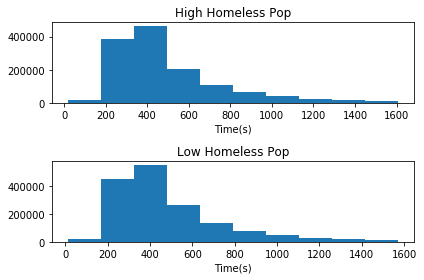

In [40]:
mann_whit_u(df[df['call_to_scene'] > 0], 'Neighborhooods - Analysis Boundaries', high_homeless, 'call_to_scene', 'High Homeless Pop','Low Homeless Pop')
plt.savefig('High_to_Low_Homeless_Hist.png')

Given the very high sample size, it gets a very low P - Value, so we can reject the null hypothesis

# Comparing Response Time by Call Type Group

Null Hypothesis: Life threatening calls have same EMS response rate as non-life threatening calls

Alternate: They are different

Average for High Homeless Pop Areas: 507.6112968607359
Average for else: 528.4232555801515
P-Value: 4.0003170434390654e-214


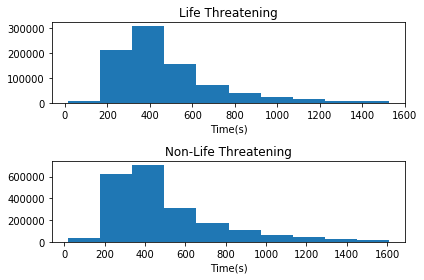

In [41]:
mann_whit_u(df[df['call_to_scene'] > 0], 'Call Type Group', ['Potentially Life-Threatening'], 'call_to_scene', 'Life Threatening','Non-Life Threatening')
plt.savefig('Life_Threat_to_Non_Hist.png')

In [295]:
#Results: Reject Null hypothesis, they are faster